# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [21]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [22]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

Text(0.5,1,'LSTAT vs Prices')

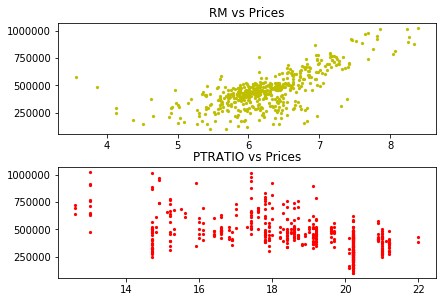

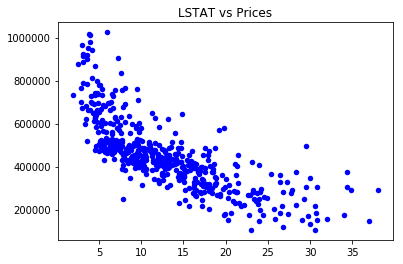

In [23]:
plt.figure(1)
plt.subplot(2,1,1)
plt.scatter(features['RM'], prices, linewidths=0.05, c = 'y', s = 10)
plt.title("RM vs Prices")
plt.tight_layout(pad=0.04, w_pad=0.05, h_pad=1.0)
plt.subplot(2,1,2)
plt.scatter(features['PTRATIO'], prices, linewidths=0.01,c = 'r', s = 10)
plt.title("PTRATIO vs Prices")
plt.tight_layout(pad=0.0004, w_pad=0.005, h_pad=0.010)

plt.figure(2)
plt.scatter(features['LSTAT'], prices, linewidths=0.01,c = 'b', s = 30)
plt.title("LSTAT vs Prices")

**Answer:  
From the above 3 scatter plot it gives us a better intuition of which feature is more important than the others when it comes to choosing a house.**

**1. If we see RM(No. of rooms) as the main feature we would see that RM greater than 7.5 has a higher has a higher value for the price placing 75,000USD and more. It is also seen that most RM between 5.75 and 7 has the majority of the prices distribution. Hence a home that has an 'RM' value of 7- 7.5 be worth more than a home that has an 'RM' value of 6 - 6.5.**

**2. PTRATIO is distributed through out the plot equally making it a little bit harder to make any solid decision just by this feature only. However, it is pretty clear to see that PTRATIO less than 14 has the highest value of the house. That means it would be nice to have less PT ratio hence more better quality education is accessible. But we also notice that PTRAION between 15 and 18 are also having a higher house prices. Hence we can conclude that we can't make a solid decision just using PTRATIO alone.**

**3. If we see the last plot we can have a better understanding of how LSTAT could play a major role when it comes to buying a house. First we'll notice a steep price hike when LSTAT is less than 9 which only grows upwards and highset when LSTAT is lesser than 4 and down. So it is very evident that a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 9 or less have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 15 or more.**

----
## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [24]:
# TODO: Import 'r2_score'
from sklearn.metrics import mean_squared_error, r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [25]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer: R2 score is 92.3%.**

**We know that R2 score is basically** *1 - residual sum of square / total sum of squares* **, where residual sum of square is the best fitting line for all the data points and total sum of squares is the average line fitted for all the data points. Here we got a R2 score of .92 which is on the higher side i.e. 92 percent of the variance in Y is predictable from X. This also tells us how good is our residual line compared to our average line i.e. mean prices. So this above model have captured the variation of the target variable. One thing we should keep in mind is that the this for 5 records only so it may be hard to draw a conclusion which is significant.**

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [26]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices,test_size = 0.20, random_state = 0)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer:** 

**1. We train our model based on some data and our model learns the correlation between the features and learn from them, this learning then gets applied to a dataset that is totally unknown to the model. Thus, the model predicts the new results based on this new dataset. This data set is called testing dataset and the data that we used for training is called training dataset.** 

**2. Now that we've given our model a proper training i.e. making it understand the relations, pattern between them we don't want our model memorises it which will be pretty much the same as going to an exam memorizing but unable to apply it onto the maths. Similar to this we also don't want our model not to apply it on newer dataset which is called Overfitting. This is very basic yet a huge problem in machine learning.**

**3. Because of reason 2 we would like to split our data into different datasets namely train and testing datatset. So if we split the data into train and test set we want train set to be more and test to be a small but significant part of the total dataset like 20 - 25%. Also, we would want to keep all the important features that actually helps our model to understand the patterns and correlation better else our model may have a pre notion or a bias that will lead to us a situation call underfitting. Based on the above discussions it is clear that we would like to have a clear split between train and testing data with 70 - 30 or 75 - 25 percent split with important features intacted.**

**4. Although having a lot of training data could lead to overfitting sometimes, the main source of overfitting and underfitting are usually the model complexity i.e. how we are setting our hyper parameters. Hence splitting the dataset definitely doesn't automatically guarantee the model won't overfit.**

**We don't generally worry too much about underfitting as it is very evident by seeing the train data set accuarcy metric itself where it would do poorly, so it could be easily detectable and easy to solve.** 

**Now if we train our model which performs well on the training data thus not doing any underfitting we still need to figure out how we can stop overfitting and how our model generalizes well on any unseen data. Generalization means "how well the concepts learned by a learning model from trainig data and then apply to a specific set of examples not seen by the model when it was learning." Which means our model will do good on the accuracy metric of training set and will fall flat on the accuracy metric of testing test where it hasn't seen the noise and patterns of the testing set.**

**This leads us to simplifying our model and tune the hyperparameters so well that it gives us the 'just right' predictions, i.e. a proper generalization of the training data. This brings us having a separate training and testing sets to help in this scenario. The initial training data will generate multiple mini train-test splits(folds) and use all of them except one of the fold as the training data and the remaining one as a testing data. This process then iterates on for number of folds and will give us even better accuracy for our data hence, a better performance on the main test data set which we would hold out for final testing. This method is known as 'cross validation' testing and this particular folding method is known as 'k fold cross validation test'. Cross-validation allows us to tune our hyperparameters with each iterations for our original training set. This allows us to keep test set as complete unseen dataset for selecting the final model. More on K - fold cross validation answered in later questions.**

**K fold or shuffle split for decreasing the chance of overfitting clubbed with 'grid search' which gives us a very good set of hyperparameters will help us generate the perfect model which we can test on the final unseen datadet.**

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

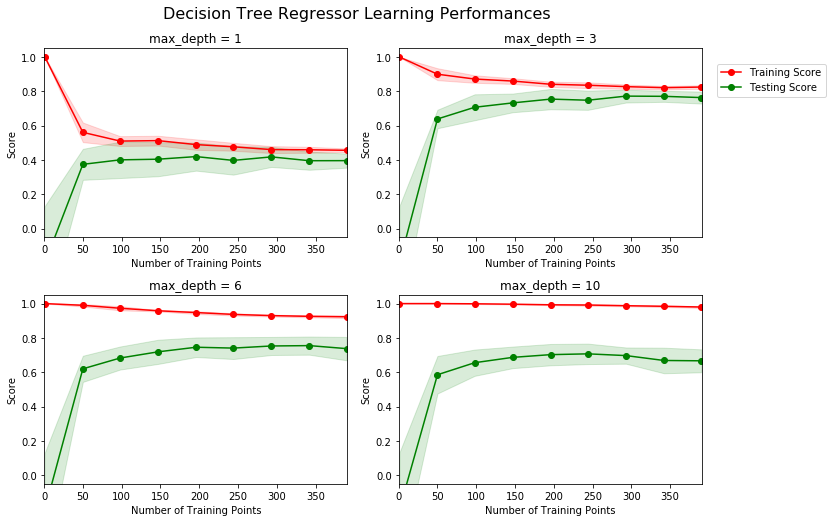

In [8]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

# Question 4 - Learning the Data

#### Choose one of the graphs above and state the maximum depth for the model.
#### What happens to the score of the training curve as more training points are added? What about the testing curve?
#### Would having more training points benefit the model?

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:** 
                    
**max_depth1: 1. As we see the increase in training data the training curve is getting decreased and testing curve is increasing and after a certain number of points it is increasing by a very slow merginal value. The same we can say about the training curve wehere it is increasing by a very slow merginal value.**

**2. This could mean that the model is not good at fitting the data points as the training set increases. And thus we can say this model is** *high biased*. **If we notice the testing curve also not increasing nor decreasing anymore hence it has reached a plateau hence adding more training points won't help our course. Both the curve may converge at a point which is very high and late.**

**max_depth3: This above graph tells us that with increasing training points testing curve is increasing and training curve is decreasing and it's completely feasible that both the curves will converge at a low point. Which implies that the model fits the data well and providing more tarining points the convergance point will also come closer. We can call this a** *Proper Fit.*

**max_depth6: This above graph tells us that with increasing training points testing curve is increasing and after a certain point it remains plateau. Also the training curve doesn't decreases much thus we could conclude that this model is having** *high variance* **which means the model is slightly overfitting, i.e. the chance of it converge is pretty low and it requires more training dataset to understand the patterns and generalize well on the test data set.**

**max_depth10:This above graph tells us that with increasing training points testing curve is increasing and after a certain point it remains plateau. The training curve however doesn't decreases and stays at 1, thus we could conclude that this model is having very** *high variance* **which means the model is overfitting, i.e. the curves will come closer but will never converge and there will be a gap between them and it requires more training dataset to understand the patterns and generalize well on the test data set.**

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

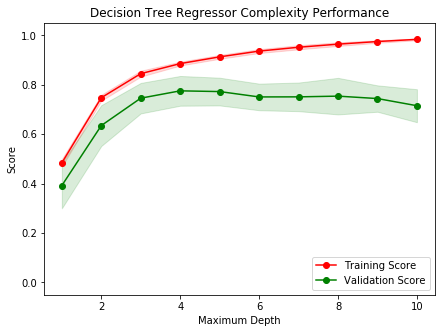

In [9]:
vs.ModelComplexity(X_train, y_train)

# Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: When the model is trained with a maximum depth of 1 the model does pretty bad with the training data itself, meaning it was unable to find the correlation between the features. Thus, failing performing well in the test set as well. Therefore, we can say the model has suffered from a high bias thus unable to pick up the nuances in the data. A case of** *Underfitting.*
 
**Now, when the model has a maximum depth of 10 the model does exceptionally well in the training data hence we see a score of pretty much 1 all the time but when we look at the testing score we see it didn't do as well and the train and tesining curve will never converge at a point. This is because the model is high on variance and thus a case of** *Overfitting.*

**From the above graph we can see the more the depth increases i.e. more than 4 the model tends to shift towards overfitting. And on the left side as it decreases it underfits. A good case would be a depth of 3 which we already plotted in one of the plots above. It fits the training data well and generalizes them well onto the testing set.**

# Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: I think the best result of the model would be good as max_depth = 3**

**The training score seems to reach a plateau here, telling us that the highest possible score for the model's ability to generalize testing data. This is because if we move it towards 4 and beyond we see the curves are moving apart which tells us that the lines won't converge at any point and there will be some distance between them hence it is clearly overfitting. Where as at max_depth 3 the gap seems to be at very good place where it would coverge at a low point.**

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

# Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: Grid search is a technique through which we can come to know the best set of rightly tuned hyperparameters for a machine learning model. Hyperparameters are not the model parameters and it is not possible to find the best set from the training data. This are the matter parameter which we don't generally choose while defining our model, e.g. for Decision tree hyperparameter is Max_depth; The pattern here is similar to a grid, where all the values are placed in the form of a matrix, We build a model for every combination of various hyperparameters and evaluate each model. The model which gives us the highest score in terms of different model evalutaion scale(e.g. accuracy/F1 score etc) wins. We also have somthing called random search, and the difference is pretty sublime, in grid search we would pass a dictionary and provide the combinations where as in random search the combination would be random.**

**While doing grid search we use an argument call 'Parameter/Param' and here we declare the set of hyperparameters where we would like them to train the model with every combination that we provide. For e.g.**

**For SVM, C = [1.0, 2.0, 5.0, 8.0],
                   Kernel = ['rbf', 'poly',' linear'] -> Passing this as a dictionary to 'Parameter/Param'**
                  
**This will give us a set of models like:** 

**svm.SVC(c = 1.0, Kernel = 'rbf') 
svm.SVC(c = 1.0, Kernel = 'poly') 
svm.SVC(c = 1.0, Kernel = 'kernel')**

**svm.SVC(c = 2.0, Kernel = 'rbf') 
svm.SVC(c = 2.0, Kernel = 'poly') 
svm.SVC(c = 2.0, Kernel = 'kernel')**

**svm.SVC(c = 5.0, Kernel = 'rbf') 
svm.SVC(c = 5.0, Kernel = 'poly') 
svm.SVC(c = 5.0, Kernel = 'kernel')** and so on..

**From this above sets of combinations we would calculate accuracy or F1 score and get the highest score and that would be our choice of hyperparameter.**

# Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: We generaly split our dataset into two dataset, training and testing dataset. The reason we use cross validation techniques is that when we fit a model, we are fitting it to a training dataset. Without cross validation we only have information on how does our model perform to our sample training data. And then we only have testing dataset to check how it is doing, Ideally we would like to see how does the model perform when we have a new data in terms of accuracy of its predictions. And we should use our testing data only once. Therefore, we need cross validation method where we would split our training data set into two parts i.e. training and validation set, where we would train our model parameters on the training data and validate them on the validation data and finally test them on the testing data.**

**There two types of cross validation you can perform: leave one out and k fold. The former may be more computationally demanding. We mostly use K fold, where k is the number of folds/set of data we are splitting them into, we use each fold as testing data and use k-1 folds as training data and validate against testing data and we repeat them k times. Then we get the average performance score, k-fold cross validation useful for small dataset since it maximizes both the test and training data.**

**Now when it comes to grid search it has a set of models which differs from each other in their parameter values. Then we train each of the models and evaluate it using cross-validation. Then we select the one that performed best by taking it parametric score such as accuracy or F1 score.**

**By doing this we are getting a less variance on our validation data on which we are actaully testing the grid search. Hence having the model perform better. If we do not use a cross-validation set and we run grid-search, we would have different sets of optimal parameters due to the fact that without a cross-validation set, the estimate of training data/sample performance would have a high variance therefore it might not perform as expected on the actual testing set.**

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [27]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    #cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
    cv_sets = ShuffleSplit(X.shape[0],  test_size = 0.20, random_state = 0)
    #cv_sets = cross_val_score(regressor, X_train, y_train, cv = 10)
    

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)  

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dic_range = range(1, 11)
    params = dict(max_depth=dic_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring= scoring_fnc,  cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

# Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [28]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: In question 6 my prediction was max_depth of 3 which showed in the plot a good fit to the data. My model predicted a max_depth of 4 which is also pretty close compared to my prediction. The result is pretty much close with a good fit to the data, below are all the params for my prediction.**

In [29]:
#reg.predict([[5,17,15],[4,30,22]])
bab = reg.predict(X_test)
#bab giving us a set of prediction if we take our entire test set into consideration

In [30]:
# All the paramaters
reg.get_params()

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


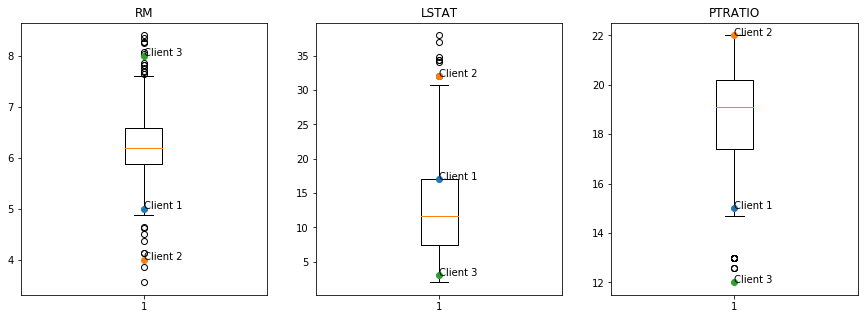

In [31]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    
plt.figure(figsize=(15, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.title(col)
    for j in range(3):
        plt.plot(1, client_data[j][i], marker='o')
        plt.annotate('Client %s' % str(j+1), xy=(1, client_data[j][i]))

**Answer: Prices I would recommend to my clients are as follows: 

**Client 1. 391,184 USD**

**Client 2. 189,124 USD**

**Client 3. 942,667 USD**

From EDA we found:

Minimum price: 105000.0 USD
Maximum price: 1024800.0 USD
and Mean price: 454342.9447852761 USD

**How it fared compared to what we assumed: **1. The houses prices from client 1 and client 2 are below the mean price. And based on the test data it seems feasible.**

**2. For client 2 since LSTAT and PTRATIO are comparatively on the higher side we expect a lower price which we pretty much predicted as these are the two most dominant features in our model.**

**3. For client 3 the price is way above the mean price given the low LSTAT and PTRATIO and a considerably high RM.**

**4. Based on what we saw so far into our intution from building the model, our model is bringing light to all the points that we've raised during the EDA part.**

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [14]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:**

**The algorithm learned from a very old dataset that may not be relevant because demographics have changed a lot since 1978. According to current standards of 2018 this could easily be irrelavant because there's a gap between 40 years.**

**Here there are only 3 features used, there are more features that can be included for example public transport access, hospitals, entertainments centers etc. People who are paying a huge sum would definietly look for additional facilities like swimming pool, gym, security, close gas stations etc.**

**Although we're using 40 years old data I believe my model is robust enough to make new predictions, however addition of new feature would make my model more robust and easy to predict**

**Data collected from a rural city is not going to be applicable as the demographics changes over time. Plus the gap between the data and current time changes a lot. Plus all the extra aminities and features that I just mentioned also comes into the picture.**

**No it's not, but when we're seeing the highest amount and the prices range we ned to understand on what basis the prices are going up. Hence, neighborhood would become a very important factor in this case.**

**In conclusion I would like to add the followings:**
    **1. My model could be used in a real - world setting because my model is robust enough to predict the main features, noises from the dataset and also while applying it on the test set it also gets to reduce the glaring problems like overfitting.**
    **2. The only caveat I have is that since the data set is pretty old and the dataset also have very less number of features, To me that doesn't fulfill all the real world features that could actually make a buyer think to a certain house at a certain neighbourhood.**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.